In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from nltk.corpus import gutenberg
import re
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import NMF

In [3]:
df = sklearn.datasets.fetch_20newsgroups().data

In [4]:
type(df)

list

In [5]:
len(df)

11314

In [6]:
df[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [7]:
# Creating the tf-idf matrix and limiting the maximum features to remove junk words
vectorizer = TfidfVectorizer(stop_words='english',max_features  = 10000)

df_tfidf=vectorizer.fit_transform(df)

In [8]:
# Getting the word list.
terms = vectorizer.get_feature_names()

In [9]:
[vectorizer.idf_,vectorizer.vocabulary]

[array([4.17690557, 4.31043697, 8.9475902 , ..., 8.03129947, 6.36359264,
        7.56129584]), None]

In [10]:
vectorizer.get_feature_names()

['00',
 '000',
 '005',
 '01',
 '02',
 '02238',
 '02p',
 '03',
 '030',
 '0358',
 '04',
 '040',
 '0400',
 '05',
 '06',
 '07',
 '08',
 '09',
 '0b',
 '0c',
 '0d',
 '0el',
 '0em',
 '0g',
 '0i',
 '0l',
 '0m',
 '0p',
 '0q',
 '0qax',
 '0t',
 '0tbxn',
 '0tq',
 '0u',
 '0w',
 '10',
 '100',
 '1000',
 '101',
 '102',
 '1024',
 '1024x768',
 '102nd',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '10k',
 '10th',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '117',
 '118',
 '119',
 '12',
 '120',
 '1200',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '1280x1024',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '13p',
 '13q',
 '13s',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '1500',
 '151',
 '152',
 '153',
 '1542',
 '155',
 '156',
 '157',
 '158',
 '159',
 '15o',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '16550',
 '167',
 '16m',
 '16mb',
 '17',
 

In [11]:
# Number of topics.
ntopics=3

In [12]:
# Linking words to topics
def word_topic(tfidf,solution, wordlist):
    
    # Loading scores for each word on each topic/component.
    words_by_topic=tfidf.T * solution

    # Linking the loadings to the words in an easy-to-read way.
    components=pd.DataFrame(words_by_topic,index=wordlist)
    
    return components

In [13]:
type(df_tfidf)

scipy.sparse.csr.csr_matrix

In [14]:
print(df_tfidf)

  (0, 6178)	0.17440640686005332
  (0, 1699)	0.12399260515184235
  (0, 4606)	0.12971355439033083
  (0, 8913)	0.07305338415911784
  (0, 5600)	0.07939955853115743
  (0, 5499)	0.09158049886837556
  (0, 4725)	0.09694458977230488
  (0, 4420)	0.11058870876556653
  (0, 7102)	0.14351785908901954
  (0, 9938)	0.0803586419647836
  (0, 8398)	0.1437540794972938
  (0, 3386)	0.12877542883936163
  (0, 5953)	0.11723820432161398
  (0, 5175)	0.05674520245538976
  (0, 1585)	0.1155419817702518
  (0, 7624)	0.10831497829699888
  (0, 8063)	0.1308299324384881
  (0, 1741)	0.176045266491758
  (0, 791)	0.12639107757400175
  (0, 8283)	0.09976237099508736
  (0, 7415)	0.0751140660576822
  (0, 3122)	0.15381404167936413
  (0, 1816)	0.09158049886837556
  (0, 3233)	0.11204394345466276
  (0, 5260)	0.12220433154614944
  :	:
  (11313, 8088)	0.15814565371671035
  (11313, 4783)	0.106275261175545
  (11313, 4463)	0.15507257384749953
  (11313, 1814)	0.22298468068081742
  (11313, 9182)	0.11775102892744028
  (11313, 5115)	0.146721

In [15]:
def top_words(components, n_top_words):
    n_topics = range(components.shape[1])
    index= np.repeat(n_topics, n_top_words, axis=0)
    topwords=pd.Series(index=index)
    for column in range(components.shape[1]):
        # Sort the column so that highest loadings are at the top.
        sortedwords=components.iloc[:,column].sort_values(ascending=False)
        # Choose the N highest loadings.
        chosen=sortedwords[:n_top_words]
        # Combine loading and index into a string.
        chosenlist=chosen.index +" "+round(chosen,2).map(str) 
        topwords.loc[column]=[x for x in chosenlist]
    return(topwords)

In [16]:
# Number of words to look at for each topic.
n_top_words = 50

In [17]:
# LSA (Latent Semantic Analysis)

svd= TruncatedSVD(ntopics)
lsa = make_pipeline(svd, Normalizer(copy=False))
df_lsa = lsa.fit_transform(df_tfidf)

components_lsa = word_topic(df_tfidf, df_lsa, terms)

topwords=pd.DataFrame()
topwords['LSA']=top_words(components_lsa, n_top_words)

In [18]:
components_lsa

,0,1,2
00,40.789254,-11.584870,0.962871
000,31.103350,2.982717,-2.311396
005,0.376488,-0.097524,0.073700
01,12.362984,0.612560,-0.434957
02,13.677261,0.052040,0.153928
...,...,...,...
zs,0.150141,-0.088246,-0.031986
zuma,5.916609,4.663231,-1.079899
zv,0.378029,-0.221751,-0.027617
zx,5.269998,-0.914420,-0.469101


In [19]:
# LDA (Latent Dirchelet Allocation)

lda = LDA(n_components=ntopics, 
          doc_topic_prior=None, # Prior = 1/n_documents
          topic_word_prior=1/ntopics,
          learning_decay=0.7, # Convergence rate.
          learning_offset=10.0, # Causes earlier iterations to have less influence on the learning
          max_iter=10, # when to stop even if the model is not converging (to prevent running forever)
          evaluate_every=-1, # Do not evaluate perplexity, as it slows training time.
          mean_change_tol=0.001, # Stop updating the document topic distribution in the E-step when mean change is < tol
          max_doc_update_iter=100, # When to stop updating the document topic distribution in the E-step even if tol is not reached
          n_jobs=-1, # Use all available CPUs to speed up processing time.
          verbose=0, # amount of output to give while iterating
          random_state=0
         )

df_lda = lda.fit_transform(df_tfidf) 

components_lda = word_topic(df_tfidf, df_lda, terms)

topwords['LDA']=top_words(components_lda, n_top_words)

In [20]:
# NNMF (Non-Negative Matrix Factorization)

nmf = NMF(alpha=0.0, 
          init='nndsvdar', # how starting value are calculated
          l1_ratio=0.0, # Sets whether regularization is L2 (0), L1 (1), or a combination (values between 0 and 1)
          max_iter=200, # when to stop even if the model is not converging (to prevent running forever)
          n_components=ntopics, 
          random_state=0, 
          solver='cd', # Use Coordinate Descent to solve
          tol=0.0001, # model will stop if tfidf-WH <= tol
          verbose=0 # amount of output to give while iterating
         )
df_nmf = nmf.fit_transform(df_tfidf) 

components_nmf = word_topic(df_tfidf, df_nmf, terms)

topwords['NNMF']=top_words(components_nmf, n_top_words)

In [21]:
# For each topic, we list the ten most-relevant words according to each method:

for topic in range(ntopics):
    print('Topic {}:'.format(topic))
    print(topwords.loc[topic])

Topic 0:
                   LSA                 LDA               NNMF
0           edu 389.27           edu 201.9           com 9.78
0            com 284.0          com 158.01           edu 6.15
0        subject 175.0        people 105.3        windows 5.0
0         lines 173.61       writes 101.63         lines 4.26
0  organization 171.86       article 97.75       subject 4.24
0        writes 163.17           god 95.06  organization 4.16
0       article 161.41           don 85.48           use 3.61
0    university 150.48       subject 83.75       posting 3.43
0       posting 137.82  organization 81.58            ca 3.35
0          like 134.12         lines 81.29          like 3.33
0           don 133.39          just 79.21          host 3.31
0          host 131.99          like 74.39          nntp 3.26
0          nntp 130.75          think 73.1         drive 3.19
0          just 130.72          know 67.89       article 3.19
0            ca 127.79    university 67.52        writes 3.18

# Sparsity

# Religious keywords

In [23]:
# The words to look at.
targetwords=['religious','christianity','israel']

In [24]:
# Storing the loadings.
wordloadings=pd.DataFrame(columns=targetwords)

In [25]:
# For each word, extracting and string the loadings for each method.
for word in targetwords:
    loadings=components_lsa.loc[word].append(
        components_lda.loc[word]).append(
            components_nmf.loc[word])
    wordloadings[word]=loadings

In [26]:
# Labeling the data by method and providing an ordering variable for graphing purposes. 
wordloadings['method']=np.repeat(['LSA','LDA','NNMF'], ntopics, axis=0)
wordloadings['loading']=list(range(ntopics))*3

In [27]:
wordloadings.shape

(9, 5)

In [28]:
wordloadings.head()

,religious,christianity,israel,method,loading
0,16.199342,16.408316,35.818994,LSA,0
1,10.658441,13.168499,19.817396,LSA,1
2,-0.897986,0.618547,4.305008,LSA,2
0,18.053329,19.586145,30.322952,LDA,0
1,1.283442,1.216310,2.763823,LDA,1


In [29]:
sns.set(style="darkgrid")

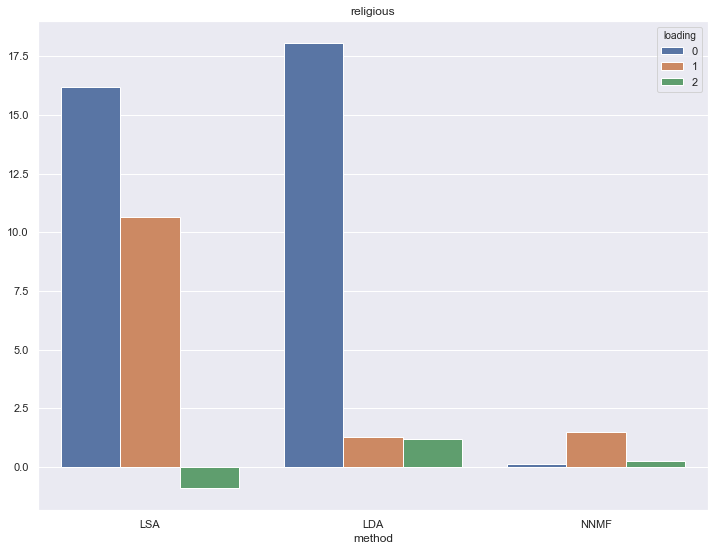

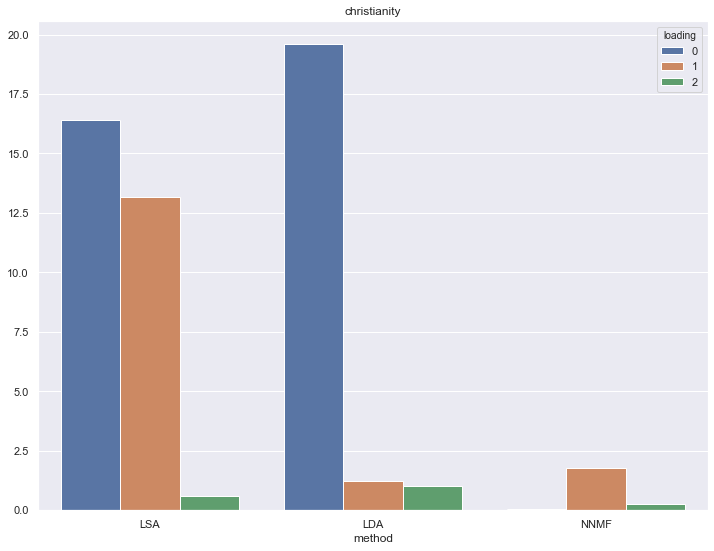

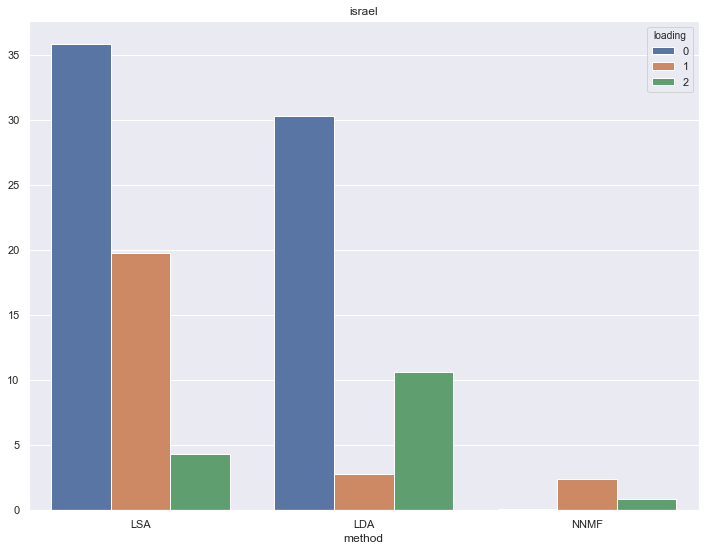

In [30]:
for word in targetwords:
    plt.subplots(figsize=(12,9))
    sns.barplot(x="method", y=word, hue="loading", data=wordloadings)
    plt.title(word)
    plt.ylabel("")
    plt.show()

# University keywords

In [31]:
targetwords=['upenn','berkeley','georgia']

In [32]:
# Storing the loadings.
wordloadings=pd.DataFrame(columns=targetwords)

In [33]:
for word in targetwords:
    loadings=components_lsa.loc[word].append(
        components_lda.loc[word]).append(
            components_nmf.loc[word])
    wordloadings[word]=loadings

In [34]:
wordloadings['method']=np.repeat(['LSA','LDA','NNMF'], ntopics, axis=0)
wordloadings['loading']=list(range(ntopics))*3

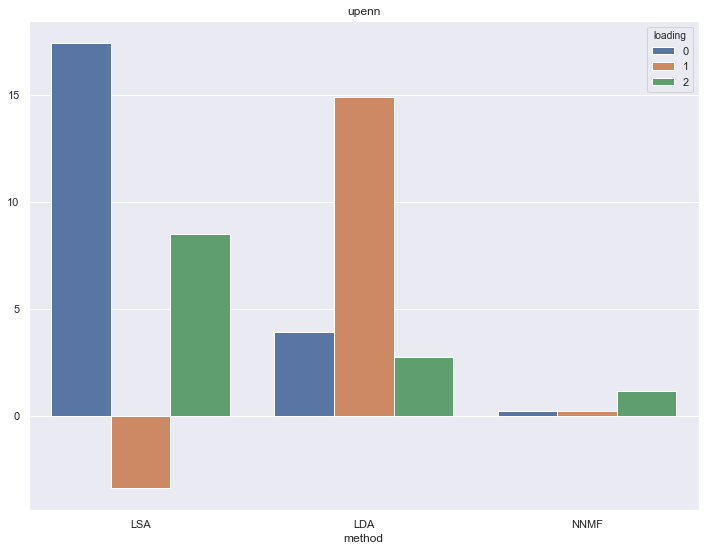

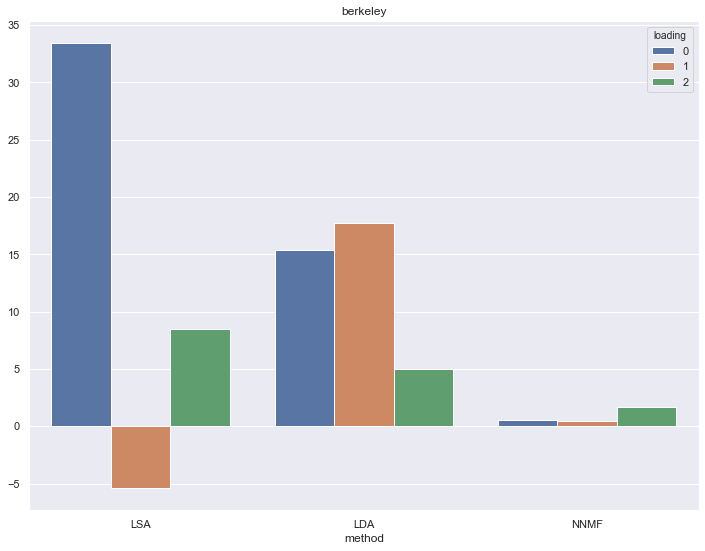

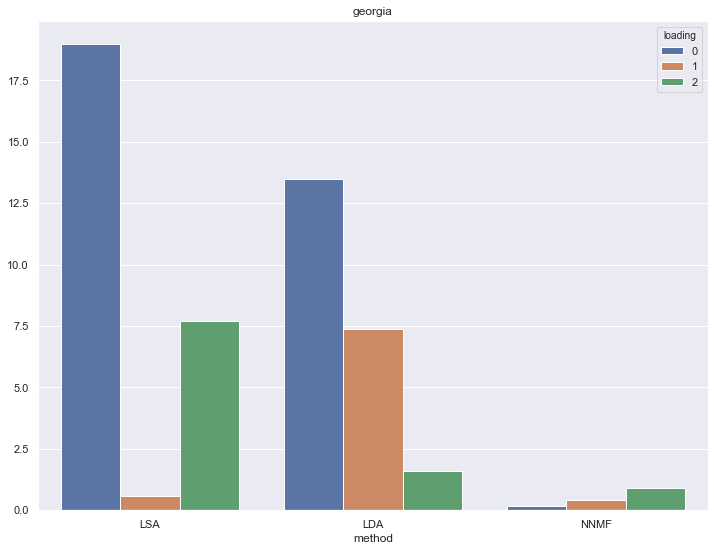

In [35]:
for word in targetwords:
    plt.subplots(figsize=(12,9))
    sns.barplot(x="method", y=word, hue="loading", data=wordloadings)
    plt.title(word)
    plt.ylabel("")
    plt.show()

# Tech keywords

In [36]:
targetwords=['windows','software','computer']

In [37]:
# Storing the loadings.
wordloadings=pd.DataFrame(columns=targetwords)

In [38]:
for word in targetwords:
    loadings=components_lsa.loc[word].append(
        components_lda.loc[word]).append(
            components_nmf.loc[word])
    wordloadings[word]=loadings

In [39]:
wordloadings['method']=np.repeat(['LSA','LDA','NNMF'], ntopics, axis=0)
wordloadings['loading']=list(range(ntopics))*3

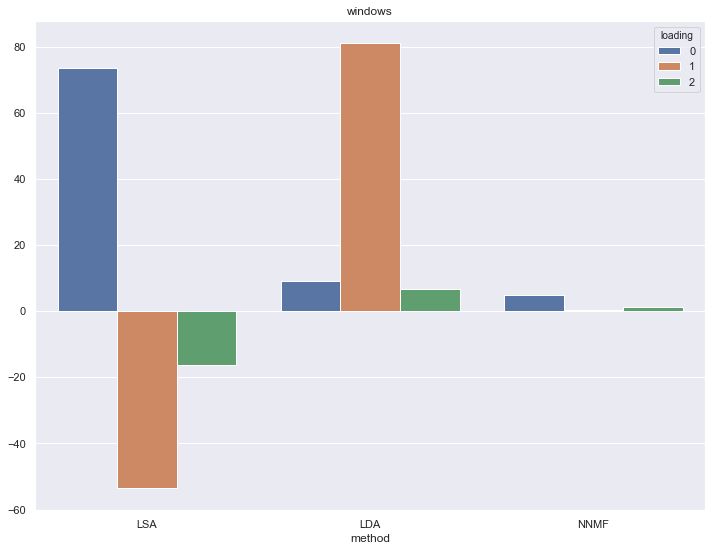

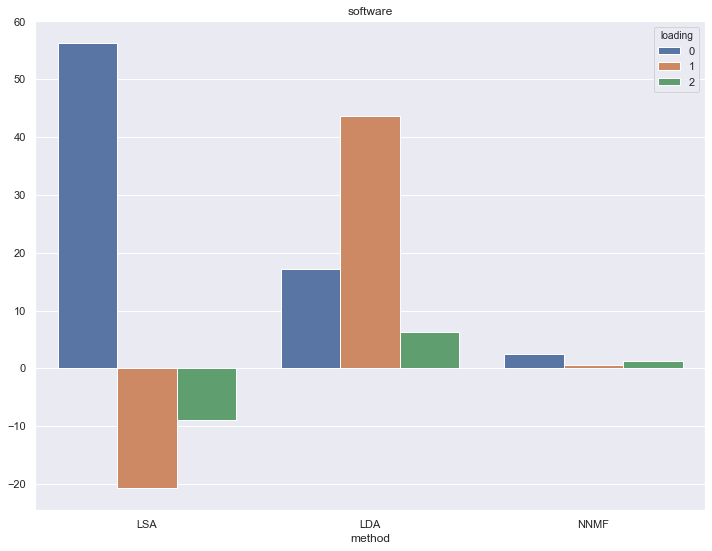

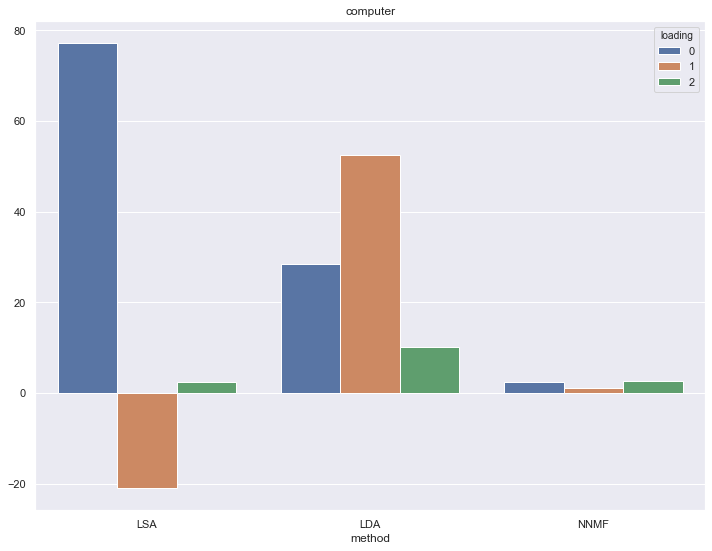

In [40]:
for word in targetwords:
    plt.subplots(figsize=(12,9))
    sns.barplot(x="method", y=word, hue="loading", data=wordloadings)
    plt.title(word)
    plt.ylabel("")
    plt.show()

# Conclusion

LSA Topic 0 seems to be the best fit for all our groups of targetwords, compared to the other two. The 0th top words list is very diverse, containing keywords for all three topics with words like "god", "university" and "computer". So it stands to reason that all of the topics I input would find strong associates with that list. But note the difference in the loadings for them.

With LDA, which takes longer to fit, the loadings present a more clear difference in which top-word listing is the best fit for the input topics. By increasing the number of top-words and reducing the number of topics I can see them clustering in a much easier to identify pattern.

I think the NNMF should probably be graphed separate from the LSA and LDA since the loadings are so much smaller. But we can still see that the loadings for the religious words fit the 1st list, educational fit the 2nd, and tech words fit the 0th list very well.

It is clear that there are benefits to fitting several models for comparison. Sometimes they reach very similar conclusions despite their different methods. And the differences they do show can help give perspective to the Data Scientist before drawing conclusions.